In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

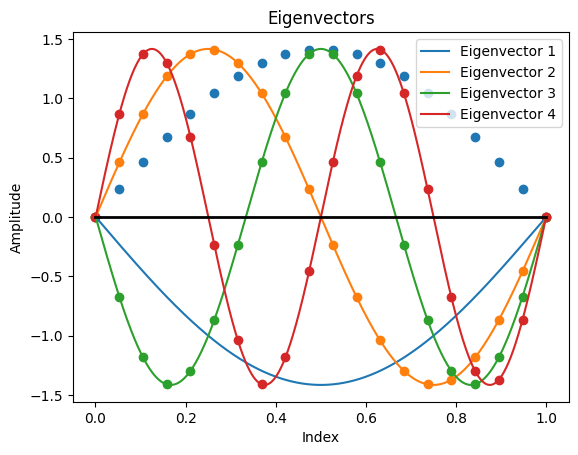

1.0000000000000002
1.0


In [3]:
data = pd.read_csv('../data/raw/eigenvectors.csv', header=None)
eigenvectors = data.to_numpy()

def normalize(psi,dx):
    return psi/np.sqrt(sum(abs(psi)**2*dx))

# Determine the number of points and create a position array
N = eigenvectors.shape[0]

x = np.linspace(0, 1, N+2)  # +2 to include the boundaries
dx = x[1]-x[0]
x_an = np.linspace(0, 1, 20)  # +2 to include the boundaries

plt.figure()
for i in range(min(4, eigenvectors.shape[1])):  # Plot the first 5 eigenvectors
    eigenvectors[:,i] = -normalize(eigenvectors[:,i], dx)
    plt.plot(x, np.insert(np.append(eigenvectors[:,i], 0), 0, 0), label=f'Eigenvector {i+1}')

plt.plot([0, 1], [0, 0], color='k', linewidth=2)
plt.scatter(x_an, np.sin(np.pi*x_an)*np.sqrt(2))
plt.scatter(x_an, np.sin(2*np.pi*x_an)*np.sqrt(2))
plt.scatter(x_an, -np.sin(3*np.pi*x_an)*np.sqrt(2))
plt.scatter(x_an, np.sin(4*np.pi*x_an)*np.sqrt(2))


plt.title('Eigenvectors')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

print(np.sqrt(np.sum(dx*abs(eigenvectors[:, i])**2)))
print(np.sum(((np.sin(np.pi*x)*np.sqrt(2))**2)*dx))






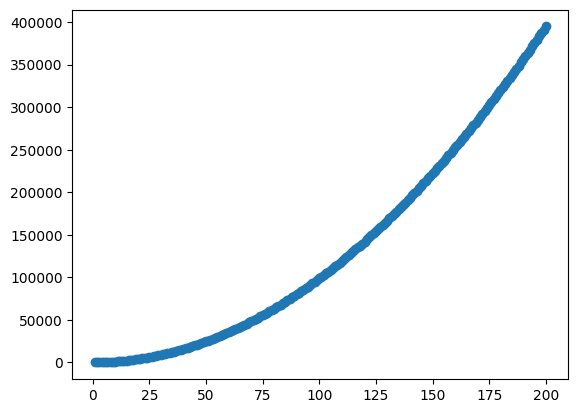

In [5]:
data = pd.read_csv('../data/raw/eigenvalues.csv', header=None)
eigenvalues = data.to_numpy()

n = eigenvalues.shape[0]
n_arr = np.linspace(1, n, n)
plt.scatter(n_arr, (n_arr*np.pi)**2)
plt.plot(n_arr, eigenvalues)


(2002, 500)


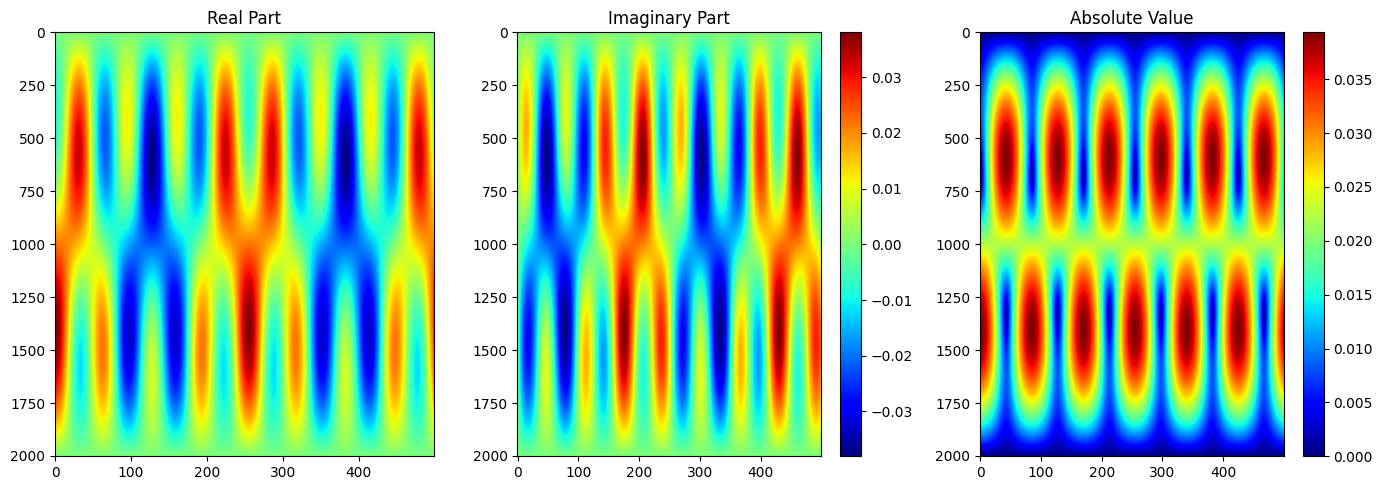

In [6]:
data = pd.read_csv('../data/raw/wavefunctions.csv', header=None)

# Convert the DataFrame to a numpy array
data = data.values

def string_to_complex(s):
    return complex(s.replace('i', 'j'))

string_to_complex_v = np.vectorize(string_to_complex)
data = string_to_complex_v(data)
real_parts = data[:,0:500].real  # Take every other column starting from 0
imag_parts = data[:,0:500].imag  # Take every other column starting from 1

# Calculate the absolute values
absolute_values = np.sqrt(real_parts**2 + imag_parts**2)
print(real_parts.shape)
# Plotting
plt.figure(figsize=(14, 5))

# Plot real part
plt.subplot(1, 3, 1)
plt.imshow(real_parts, cmap= "jet", aspect='auto')
plt.title('Real Part')

# Plot imaginary part
plt.subplot(1, 3, 2)
plt.imshow(imag_parts, cmap= "jet", aspect='auto')
plt.colorbar()
plt.title('Imaginary Part')

# Plot absolute value
plt.subplot(1, 3, 3)
plt.imshow(absolute_values, cmap= "jet", aspect='auto')
plt.colorbar()
plt.title('Absolute Value')

plt.tight_layout()
plt.show()
